In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Importing fundamental data exploration libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline


In [5]:
df_train2018 = pd.read_csv("./Downloads/TR30 TrainingDataset/TR30 2018 Training Data.csv")
df_train2017 = pd.read_csv("./Downloads/TR30 TrainingDataset/TR30 2017 Training Data.csv")
df_train2016 = pd.read_csv("./Downloads/TR30 TrainingDataset/TR30 2016 Training Data.csv")

df_train2018.head()

,YYYY/MM/DD HH:MM:SS,HV Winding Current,LV Winding Current,TV Winding Current,Group 1 fan current,Group 2 fan current,Month of last measurement,Day of last measurement,Year of last measurement,Hour of last measurement,...,Partial Discharge Intensity Channel 14,Pulse Per Second Channel 14,State Channel 14,NanoCoulombs Channel 15,Millivolts Channel 15,Partial Discharge Intensity Channel 15,Pulse Per Second Channel 15,PD 1 Monitor device status,PD 1 Alarm status,PD 1 Alarm source
0,12/31/2017 23:59,3.5,4.0,26.1,0,0,12,31,2017,23,...,0.0,434,1,0.3,33,0.0,360,1,1,2560
1,1/1/2018 0:00,3.7,4.2,26.1,0,0,12,31,2017,23,...,0.0,434,1,0.3,33,0.0,360,1,1,2560
2,1/1/2018 0:01,3.5,4.3,26.1,0,0,12,31,2017,23,...,0.0,434,1,0.3,33,0.0,360,1,1,2560
3,1/1/2018 0:02,3.8,3.9,26.1,0,0,12,31,2017,23,...,0.0,434,1,0.3,33,0.0,360,1,1,2560
4,1/1/2018 0:03,3.8,4.2,26.1,0,0,12,31,2017,23,...,0.0,434,1,0.3,33,0.0,360,1,1,2560


In [6]:
df_train2018.columns

Index(['YYYY/MM/DD HH:MM:SS', 'HV Winding Current', 'LV Winding Current',
       'TV Winding Current', 'Group 1 fan current', 'Group 2 fan current',
       'Month of last measurement', 'Day of last measurement',
       'Year of last measurement', 'Hour of last measurement',
       ...
       'Partial Discharge Intensity Channel 14', 'Pulse Per Second Channel 14',
       'State Channel 14', 'NanoCoulombs Channel 15', 'Millivolts Channel 15',
       'Partial Discharge Intensity Channel 15', 'Pulse Per Second Channel 15',
       'PD 1 Monitor device status', 'PD 1 Alarm status', 'PD 1 Alarm source'],
      dtype='object', length=149)

In [10]:
df_train2017.columns

Index(['YYYY/MM/DD HH:MM:SS', 'HV Winding Current', 'LV Winding Current',
       'TV Winding Current', 'Group 1 fan current', 'Group 2 fan current',
       'Month of last measurement', 'Day of last measurement',
       'Year of last measurement', 'Hour of last measurement',
       'Minute of last measurement', 'Oil Temp at time of measurement',
       'Device Measuring Error', 'Device Alarm Status',
       'Set 1 Disabled/Enabled', 'Set 2 Disabled/Enabled',
       'Set 1 Alarm on Current Imbalance Magnitude',
       'Set 2 Alarm on Current Imbalance Magnitude',
       'Set 1 Sum Current Imbalance', 'Set 2 Sum Current Imbalance',
       'Set 1 Vector Imbalance', 'Set 2 Vector Imbalance',
       'Set 1 Sum Current Trend', 'Set 2 Sum CUrrent Trend',
       'Set 1 Magnitude Temp Dep', 'Set 2 Magnitude Temp Dep',
       'Set 1 Vector Temp Dep', 'Set 2 Vector Temp Dep',
       'Set 1 Bush 1 Power Factor', 'Set 1 Bush 1 Capacitance',
       'Set 1 Bush 2 Power Factor', 'Set 1 Bush 2 Capacitan

In [9]:
df_train2016.columns

Index(['YYYY/MM/DD HH:MM:SS', 'Cooling stage 1 contactor status',
       'Cooling stage 2 contactor status',
       'Alternate cooling stage 1 contactor',
       'Alternate cooling stage 2 contactor', 'HV Winding Current',
       'LV Winding Current', 'TV Winding Current', 'Group 1 fan current',
       'Group 2 fan current',
       ...
       'Partial Discharge Intensity Channel 14', 'Pulse Per Second Channel 14',
       'State Channel 14', 'NanoCoulombs Channel 15', 'Millivolts Channel 15',
       'Partial Discharge Intensity Channel 15', 'Pulse Per Second Channel 15',
       'PD 1 Monitor device status', 'PD 1 Alarm status', 'PD 1 Alarm source'],
      dtype='object', length=153)

In [11]:
df_train2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194557 entries, 0 to 194556
Columns: 153 entries, YYYY/MM/DD HH:MM:SS to PD 1 Alarm source
dtypes: float64(69), int64(83), object(1)
memory usage: 227.1+ MB


In [12]:
df_train2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211740 entries, 0 to 211739
Data columns (total 72 columns):
YYYY/MM/DD HH:MM:SS                             211740 non-null object
HV Winding Current                              211740 non-null float64
LV Winding Current                              211740 non-null float64
TV Winding Current                              211740 non-null float64
Group 1 fan current                             211740 non-null int64
Group 2 fan current                             211740 non-null int64
Month of last measurement                       211740 non-null int64
Day of last measurement                         211740 non-null int64
Year of last measurement                        211740 non-null int64
Hour of last measurement                        211740 non-null int64
Minute of last measurement                      211740 non-null int64
Oil Temp at time of measurement                 211740 non-null int64
Device Measuring Error                    

In [13]:
df_train2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433417 entries, 0 to 433416
Columns: 149 entries, YYYY/MM/DD HH:MM:SS to PD 1 Alarm source
dtypes: float64(63), int64(85), object(1)
memory usage: 492.7+ MB


In [14]:
df_train2018.info()  #Checking total entries,all the columns and it's datatype in the dataset.
df_train2018.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433417 entries, 0 to 433416
Columns: 149 entries, YYYY/MM/DD HH:MM:SS to PD 1 Alarm source
dtypes: float64(63), int64(85), object(1)
memory usage: 492.7+ MB


(433417, 149)

In [15]:
df_train2017.info()  #Checking total entries,all the columns and it's datatype in the dataset.
df_train2017.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211740 entries, 0 to 211739
Data columns (total 72 columns):
YYYY/MM/DD HH:MM:SS                             211740 non-null object
HV Winding Current                              211740 non-null float64
LV Winding Current                              211740 non-null float64
TV Winding Current                              211740 non-null float64
Group 1 fan current                             211740 non-null int64
Group 2 fan current                             211740 non-null int64
Month of last measurement                       211740 non-null int64
Day of last measurement                         211740 non-null int64
Year of last measurement                        211740 non-null int64
Hour of last measurement                        211740 non-null int64
Minute of last measurement                      211740 non-null int64
Oil Temp at time of measurement                 211740 non-null int64
Device Measuring Error                    

(211740, 72)

In [16]:
df_train2016.info()  #Checking total entries,all the columns and it's datatype in the dataset.
df_train2016.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194557 entries, 0 to 194556
Columns: 153 entries, YYYY/MM/DD HH:MM:SS to PD 1 Alarm source
dtypes: float64(69), int64(83), object(1)
memory usage: 227.1+ MB


(194557, 153)

In [17]:
# What are the summary statistics - describe the dataset
df_train2016.describe()

,Cooling stage 1 contactor status,Cooling stage 2 contactor status,Alternate cooling stage 1 contactor,Alternate cooling stage 2 contactor,HV Winding Current,LV Winding Current,TV Winding Current,Group 1 fan current,Group 2 fan current,Month of last measurement,...,Partial Discharge Intensity Channel 14,Pulse Per Second Channel 14,State Channel 14,NanoCoulombs Channel 15,Millivolts Channel 15,Partial Discharge Intensity Channel 15,Pulse Per Second Channel 15,PD 1 Monitor device status,PD 1 Alarm status,PD 1 Alarm source
count,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,194557.000000,...,194557.000000,194557.000000,194557.0,194557.000000,194557.000000,194557.000000,194557.000000,194557.0,194557.000000,194557.000000
mean,11.757336,11.757336,11.757336,11.757336,3.639790,4.190055,24.499359,14.768189,10.307850,9.783714,...,0.015361,543.301572,1.0,0.793605,80.731107,0.024862,418.310166,1.0,0.055403,44.874376
std,16.901359,16.901359,16.901359,16.901359,0.116802,0.118352,1.222274,35.959411,25.314181,1.148494,...,0.058457,928.784202,0.0,0.695435,71.418023,0.076751,774.944584,0.0,0.306574,287.603786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,3.600000,4.100000,23.600000,0.000000,0.000000,9.000000,...,0.000000,178.000000,1.0,0.200000,19.000000,0.000000,45.000000,1.0,0.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,3.700000,4.200000,24.600000,0.000000,0.000000,10.000000,...,0.000000,178.000000,1.0,0.400000,44.000000,0.000000,74.000000,1.0,0.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,3.700000,4.300000,25.600000,0.000000,0.000000,10.000000,...,0.000000,471.000000,1.0,1.700000,174.000000,0.000000,373.000000,1.0,0.000000,0.000000
max,52.000000,52.000000,52.000000,52.000000,3.800000,4.400000,26.100000,103.900000,102.200000,12.000000,...,1.100000,16509.000000,1.0,2.600000,256.000000,0.800000,7734.000000,1.0,2.000000,2560.000000


In [18]:
# What are the summary statistics - describe the dataset
df_train2017.describe()

,HV Winding Current,LV Winding Current,TV Winding Current,Group 1 fan current,Group 2 fan current,Month of last measurement,Day of last measurement,Year of last measurement,Hour of last measurement,Minute of last measurement,...,Hydran Gas Daily trend directly from Hydran,Hydran Temp,Hydran Moisture %RH,%RH Level hourly average,%RH Sensor temperature,%RH Sensor temperature hourly average,Hyd_Moisture_PPM directly from Hydran,%RH H2O PPM hourly average,Base plate temperature,Hydran battery voltage
count,211740.000000,211740.000000,211740.000000,211740.0,211740.0,211740.000000,211740.000000,211740.0,211740.000000,211740.000000,...,211740.000000,211740.000000,211740.000000,211740.0,211740.000000,211740.000000,211740.0,2.117400e+05,211740.000000,211740.000000
mean,3.654417,4.166103,24.382420,0.0,0.0,10.081576,16.302649,2017.0,11.503325,0.166695,...,0.465184,32.521972,0.000049,0.0,32.521970,32.506579,2.0,2.000000e-01,40.523901,3.600208
std,0.109423,0.124271,1.336031,0.0,0.0,1.387403,8.643875,0.0,6.923099,2.113175,...,0.483338,2.911206,0.004341,0.0,2.911209,1.533150,0.0,2.609863e-13,5.255138,0.004554
min,3.000000,3.600000,20.800000,0.0,0.0,8.000000,1.000000,2017.0,0.000000,0.000000,...,-0.800000,23.400000,0.000000,0.0,23.400000,28.600000,2.0,2.000000e-01,29.300000,3.600000
25%,3.600000,4.100000,23.400000,0.0,0.0,9.000000,9.000000,2017.0,6.000000,0.000000,...,0.200000,30.300000,0.000000,0.0,30.300000,31.300000,2.0,2.000000e-01,36.500000,3.600000
50%,3.700000,4.200000,24.500000,0.0,0.0,10.000000,16.000000,2017.0,12.000000,0.000000,...,0.400000,32.600000,0.000000,0.0,32.600000,32.800000,2.0,2.000000e-01,40.300000,3.600000
75%,3.700000,4.300000,25.600000,0.0,0.0,11.000000,24.000000,2017.0,18.000000,0.000000,...,0.900000,34.700000,0.000000,0.0,34.700000,33.800000,2.0,2.000000e-01,44.300000,3.600000
max,3.800000,4.400000,26.100000,0.0,0.0,12.000000,31.000000,2017.0,23.000000,27.000000,...,1.300000,41.000000,0.600000,0.0,41.000000,35.500000,2.0,2.000000e-01,57.500000,3.700000


In [19]:
# What are the summary statistics - describe the dataset
df_train2018.describe()

,HV Winding Current,LV Winding Current,TV Winding Current,Group 1 fan current,Group 2 fan current,Month of last measurement,Day of last measurement,Year of last measurement,Hour of last measurement,Minute of last measurement,...,Partial Discharge Intensity Channel 14,Pulse Per Second Channel 14,State Channel 14,NanoCoulombs Channel 15,Millivolts Channel 15,Partial Discharge Intensity Channel 15,Pulse Per Second Channel 15,PD 1 Monitor device status,PD 1 Alarm status,PD 1 Alarm source
count,433417.000000,433417.000000,433417.000000,433417.0,433417.0,433417.000000,433417.000000,433417.000000,433417.000000,433417.000000,...,433417.000000,433417.000000,433417.0,433417.000000,433417.000000,433417.000000,433417.000000,433417.0,433417.000000,433417.000000
mean,3.649641,4.141542,23.969743,0.0,0.0,5.482298,15.573448,2017.999956,11.492240,0.336650,...,0.014294,475.065697,1.0,0.286665,29.408417,0.040856,729.291788,1.0,0.169126,421.861293
std,0.113140,0.133620,1.485630,0.0,0.0,2.850399,8.721707,0.006621,6.918137,3.882363,...,0.065148,1038.339663,0.0,0.156870,15.475077,0.126779,1146.508557,0.0,0.377531,942.543842
min,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,2017.000000,0.000000,0.000000,...,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,0.000000
25%,3.600000,4.100000,22.800000,0.0,0.0,3.000000,8.000000,2018.000000,6.000000,0.000000,...,0.000000,54.000000,1.0,0.200000,17.000000,0.000000,133.000000,1.0,0.000000,0.000000
50%,3.700000,4.200000,23.900000,0.0,0.0,5.000000,16.000000,2018.000000,11.000000,0.000000,...,0.000000,129.000000,1.0,0.300000,31.000000,0.000000,360.000000,1.0,0.000000,0.000000
75%,3.700000,4.200000,25.400000,0.0,0.0,8.000000,23.000000,2018.000000,17.000000,0.000000,...,0.000000,434.000000,1.0,0.300000,33.000000,0.000000,655.000000,1.0,0.000000,0.000000
max,3.800000,4.400000,26.100000,0.0,0.0,12.000000,31.000000,2018.000000,23.000000,57.000000,...,0.900000,12159.000000,1.0,3.100000,309.000000,1.300000,8816.000000,1.0,2.000000,2560.000000


In [22]:
 df_train2016.apply(lambda x: sum(x.isnull()),axis=0) 

YYYY/MM/DD HH:MM:SS                           0
Cooling stage 1 contactor status              0
Cooling stage 2 contactor status              0
Alternate cooling stage 1 contactor           0
Alternate cooling stage 2 contactor           0
HV Winding Current                            0
LV Winding Current                            0
TV Winding Current                            0
Group 1 fan current                           0
Group 2 fan current                           0
Month of last measurement                     0
Day of last measurement                       0
Year of last measurement                      0
Hour of last measurement                      0
Minute of last measurement                    0
Oil Temp at time of measurement               0
Device Measuring Error                        0
Device Alarm Status                           0
Set 1 Disabled/Enabled                        0
Set 2 Disabled/Enabled                        0
Set 1 Alarm on Current Imbalance Magnitu

In [25]:
df_train2016['Day of last measurement'].value_counts()

19    74092
24     5778
18     5773
16     5764
17     5738
25     5025
11     4359
23     4350
22     4338
15     4331
20     4328
8      4323
14     4323
13     4323
9      4316
21     4312
7      4310
12     4308
10     4290
30     4270
29     3750
6      3699
27     2895
1      2891
4      2889
2      2881
26     2877
3      2872
5      2871
28     2847
31     1434
Name: Day of last measurement, dtype: int64

In [26]:
df_train2016['Month of last measurement'].value_counts()

10    95725
9     43200
12    28096
8     27536
Name: Month of last measurement, dtype: int64

In [27]:
df_train2016['Year of last measurement'].value_counts()

2016    184477
2015     10080
Name: Year of last measurement, dtype: int64

In [31]:
df_train2017['Day of last measurement'].value_counts()

7     7252
19    7238
29    7236
13    7225
16    7224
9     7224
23    7219
11    7212
21    7209
27    7207
25    7203
17    7199
26    7199
12    7192
28    7190
20    7187
22    7187
10    7186
15    7184
30    7180
18    7178
14    7172
24    7162
8     7160
5     5811
4     5779
2     5766
3     5757
1     5750
6     5733
31    4319
Name: Day of last measurement, dtype: int64

In [30]:
df_train2017['Month of last measurement'].value_counts()

10    44650
12    44625
11    43247
9     43212
8     36006
Name: Month of last measurement, dtype: int64

In [32]:
df_train2017['Year of last measurement'].value_counts()

2017    211740
Name: Year of last measurement, dtype: int64

In [33]:
df_train2018['Day of last measurement'].value_counts()

10    14446
21    14427
8     14418
19    14415
25    14414
12    14412
15    14412
17    14412
13    14408
24    14408
18    14407
7     14405
2     14404
4     14401
1     14400
3     14399
23    14399
26    14394
28    14394
6     14389
5     14389
27    14385
20    14381
22    14379
14    14378
16    14365
9     14363
11    14328
29    11522
30    11486
31     7277
Name: Day of last measurement, dtype: int64

In [34]:
df_train2018['Month of last measurement'].value_counts()

1     44642
8     44641
7     44636
5     44630
3     44599
6     43219
9     43208
4     43202
10    40311
2     40310
12       19
Name: Month of last measurement, dtype: int64

In [35]:
df_train2018['Year of last measurement'].value_counts()

2018    433398
2017        19
Name: Year of last measurement, dtype: int64

In [41]:
set(df_train2018)

{'%RH H2O PPM hourly average',
 '%RH Level hourly average',
 '%RH Sensor temperature',
 '%RH Sensor temperature hourly average',
 'Base plate temperature',
 'C2H2 concentration ppm',
 'C2H4 concentration ppm',
 'C2H6 concentration ppm',
 'CH4 concentration ppm',
 'CO concentration ppm',
 'CO2 concentration ppm',
 'Day of last measurement',
 'Device Alarm Status',
 'Device Measuring Error',
 'Group 1 fan current',
 'Group 2 fan current',
 'H2 concentration ppm',
 'HV Winding Current',
 'Hour of last measurement',
 'Hyd_Moisture_PPM directly from Hydran',
 'Hydran Gas',
 'Hydran Gas Daily trend directly from Hydran',
 'Hydran Gas Hourly trend directly from Hydran',
 'Hydran Moisture %RH',
 'Hydran Temp',
 'Hydran battery voltage',
 'Input module 1',
 'Input module 2',
 'Input module 3',
 'Input module 4',
 'Input module 5',
 'Input module 6',
 'LV Winding Current',
 'Millivolts Channel 1',
 'Millivolts Channel 10',
 'Millivolts Channel 11',
 'Millivolts Channel 12',
 'Millivolts Channel 

{28.1,
 28.3,
 28.4,
 28.5,
 28.6,
 28.7,
 28.8,
 28.9,
 29.0,
 29.1,
 29.2,
 29.3,
 29.4,
 29.5,
 29.6,
 29.7,
 29.8,
 29.9,
 30.0,
 30.1,
 30.2,
 30.3,
 30.4,
 30.5,
 30.6,
 30.7,
 30.8,
 30.9,
 31.0,
 31.1,
 31.2,
 31.3,
 31.4,
 31.5,
 31.6,
 31.7,
 31.8,
 31.9,
 32.0,
 32.1,
 32.2,
 32.3,
 32.4,
 32.5,
 32.6,
 32.7,
 32.8,
 32.9,
 33.0,
 33.1,
 33.2,
 33.3,
 33.4,
 33.5,
 33.6,
 33.7,
 33.8,
 33.9,
 34.0,
 34.1,
 34.2,
 34.3,
 34.4,
 34.5,
 34.6,
 34.7,
 34.8,
 34.9,
 35.0,
 35.1,
 35.2,
 35.3,
 35.4,
 35.5,
 35.6,
 35.7,
 35.8,
 35.9,
 36.0,
 36.1,
 36.2,
 36.3,
 36.4,
 36.5,
 36.6,
 36.7,
 36.8,
 36.9,
 37.0,
 37.1,
 37.2,
 37.3,
 37.4,
 37.5,
 37.6,
 37.7,
 37.8,
 37.9,
 38.0,
 38.1,
 38.2,
 38.3,
 38.4,
 38.5,
 38.6,
 38.7,
 38.8,
 38.9,
 39.0,
 39.1,
 39.2,
 39.3,
 39.4,
 39.5,
 39.6,
 39.7,
 39.8,
 39.9,
 40.0,
 40.1,
 40.2,
 40.3,
 40.4,
 40.5,
 40.6,
 40.7,
 40.8,
 40.9,
 41.0,
 41.1,
 41.2,
 41.3,
 41.4,
 41.5,
 41.6,
 41.7,
 41.8,
 41.9,
 42.0,
 42.1,
 42.2,
 42.3,
 42.4,

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



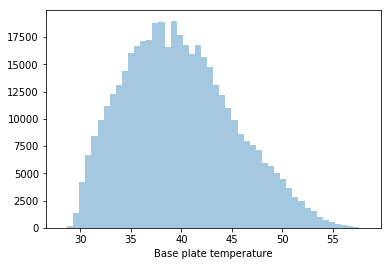

In [52]:
#histogram
sns.distplot(df_train2018['Base plate temperature'], bins=50, kde=False);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



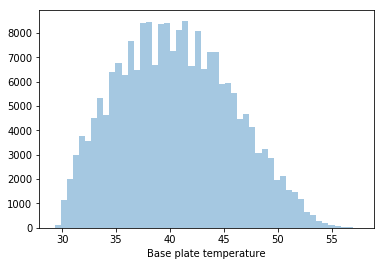

In [46]:
#histogram
sns.distplot(df_train2017['Base plate temperature'], bins=50, kde=False);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



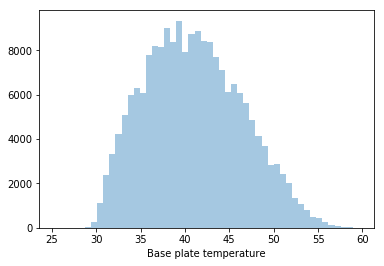

In [47]:
#histogram
sns.distplot(df_train2016['Base plate temperature'], bins=50, kde=False);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



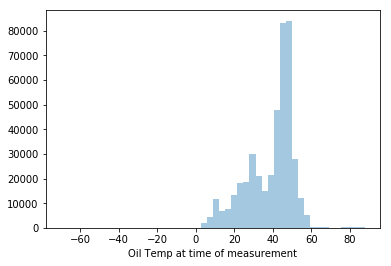

In [48]:
#histogram
sns.distplot(df_trin2018['Oil Temp at time of measurement'], bins=50, kde=False);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



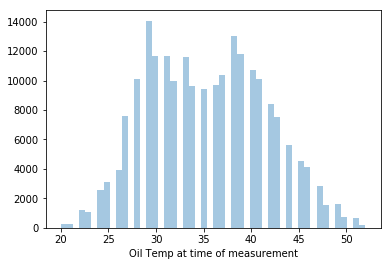

In [49]:
#histogram
sns.distplot(df_train2017['Oil Temp at time of measurement'], bins=50, kde=False);

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



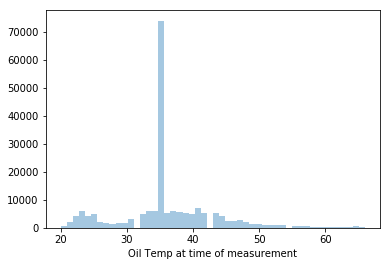

In [50]:
#histogram
sns.distplot(df_train2016['Oil Temp at time of measurement'], bins=50, kde=False);